## 1. Problem statement:
> Our task is to predict the percentage of marks that a student is expected to score based on the number of hours they are studying.

## 2. Data:
> the data set contains two labels Hours and Scores.

In [1]:
# import the necessary packges
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Import the dataset
student_score = pd.read_csv("student_scores - student_scores.csv")
student_score.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [3]:
# check for missing datas
student_score.isna().sum()

Hours     0
Scores    0
dtype: int64

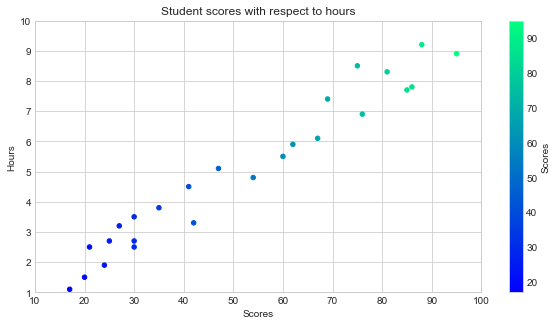

In [4]:
# let's visualize the data using plot
plt.style.use('seaborn-whitegrid')
fig,ax=plt.subplots(figsize=(10,5))
student_score.plot(x="Scores",y="Hours",kind="scatter",c="Scores",cmap="winter",ax=ax);
ax.set_xlim([10,100])
ax.set_ylim([1,10])
ax.set_title("Student scores with respect to hours");

We can see that when the number of hours increases the scores too gets increased gradually. which indicates linear regressor.

### Prediction

In [5]:
x = student_score[["Hours"]]
y = student_score["Scores"]

In [6]:
x[:5]

,Hours
0,2.5
1,5.1
2,3.2
3,8.5
4,3.5


In [7]:
y[:5]

0    21
1    47
2    27
3    75
4    30
Name: Scores, dtype: int64

### Training/Test split

In [8]:
#import package for train_test_split
from sklearn.model_selection import train_test_split 
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [9]:
x_train[:5]

,Hours
9,2.7
13,3.3
1,5.1
22,3.8
5,1.5


In [10]:
x_test

,Hours
8,8.3
16,2.5
0,2.5
23,6.9
11,5.9


In [11]:
y_train[:5]

9     25
13    42
1     47
22    35
5     20
Name: Scores, dtype: int64

In [12]:
y_test[:5]

8     81
16    30
0     21
23    76
11    62
Name: Scores, dtype: int64

### Model

In [13]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

### visualize the x and y data

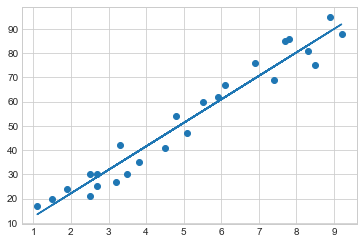

In [14]:
line = model.coef_*x+model.intercept_
plt.scatter(x, y)
plt.plot(x, line)
plt.show()

### Predict

In [15]:
y_pred = model.predict(x_test)
y_pred

array([83.18814104, 27.03208774, 27.03208774, 69.63323162, 59.95115347])

In [16]:
df = pd.DataFrame({"Actual" : y_test , "Predicted" : y_pred})
df

,Actual,Predicted
8,81,83.188141
16,30,27.032088
0,21,27.032088
23,76,69.633232
11,62,59.951153


### Test

In [17]:
hours = 8.45
test_pred = model.predict([[hours]])
print("No of Hours =",hours)
print("Predicted Score value=",test_pred[0])

No of Hours = 8.45
Predicted Score value= 84.64045275905036


### Evaluating

In [18]:
from sklearn import metrics  
print('Mean Absolute Error:',metrics.mean_absolute_error(y_test, y_pred))

Mean Absolute Error: 3.9207511902099244
